In [ ]:
from networkx.generators.random_graphs import erdos_renyi_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import random
import copy


In [ ]:
#задаем граф с 100 вершинами
n = 123
p = 0.08
G = erdos_renyi_graph(n, p)
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


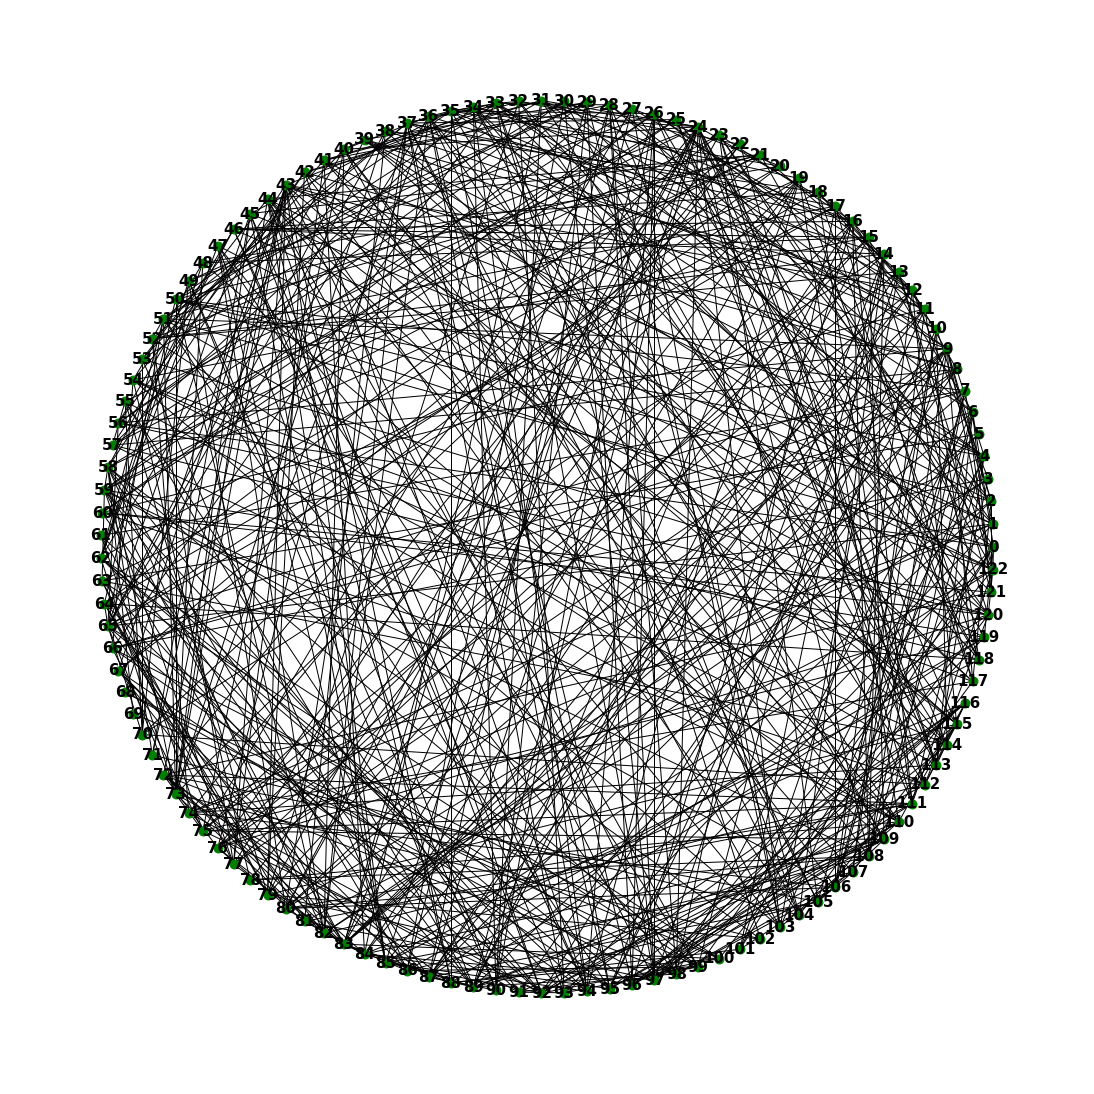

In [ ]:
pos = nx.circular_layout(G)
plt.figure(figsize=(15, 15))
nx.draw(G,
        pos,
        node_size=80,
        node_color = 'green',
        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
        with_labels=True,
        font_size=15,
       font_weight='bold')
plt.show()

In [ ]:
for i in G.nodes():
    G.nodes[i]['color'] = 'white'


In [ ]:
#функция разрушения графа
def random_choose_node(nodes, amount,color):
    new_list = sample(nodes,amount)
    leftover = list(set(nodes)-set(new_list))
    dict_colors = dict(zip(new_list,[color]*len(new_list)))
    return new_list,leftover,dict_colors

In [ ]:
green,left,green_dict = random_choose_node(list(G.nodes()), 5,'red')
green_dict

{11: 'red', 90: 'red', 59: 'red', 24: 'red', 78: 'red'}

In [ ]:
# red,left,red_dict =random_choose_node(left, 20,'red')
# red_dict

{42: 'red',
 96: 'red',
 33: 'red',
 94: 'red',
 26: 'red',
 83: 'red',
 1: 'red',
 28: 'red',
 11: 'red',
 13: 'red',
 78: 'red',
 23: 'red',
 59: 'red',
 79: 'red',
 18: 'red',
 45: 'red',
 81: 'red',
 37: 'red',
 8: 'red',
 93: 'red'}

In [ ]:
#окрашенные в красный цвет вершины
np.sort(np.array(red))

array([ 1,  8, 11, 13, 18, 23, 26, 28, 33, 37, 42, 45, 59, 78, 79, 81, 83,
       93, 94, 96])

In [ ]:
# nx.set_node_attributes(G, red_dict, 'color')
nx.set_node_attributes(G, green_dict, 'color')

In [ ]:
G.nodes.data()

NodeDataView({0: {'color': 'white'}, 1: {'color': 'white'}, 2: {'color': 'white'}, 3: {'color': 'white'}, 4: {'color': 'white'}, 5: {'color': 'white'}, 6: {'color': 'white'}, 7: {'color': 'white'}, 8: {'color': 'white'}, 9: {'color': 'white'}, 10: {'color': 'white'}, 11: {'color': 'red'}, 12: {'color': 'white'}, 13: {'color': 'white'}, 14: {'color': 'white'}, 15: {'color': 'white'}, 16: {'color': 'white'}, 17: {'color': 'white'}, 18: {'color': 'white'}, 19: {'color': 'white'}, 20: {'color': 'white'}, 21: {'color': 'white'}, 22: {'color': 'white'}, 23: {'color': 'white'}, 24: {'color': 'red'}, 25: {'color': 'white'}, 26: {'color': 'white'}, 27: {'color': 'white'}, 28: {'color': 'white'}, 29: {'color': 'white'}, 30: {'color': 'white'}, 31: {'color': 'white'}, 32: {'color': 'white'}, 33: {'color': 'white'}, 34: {'color': 'white'}, 35: {'color': 'white'}, 36: {'color': 'white'}, 37: {'color': 'white'}, 38: {'color': 'white'}, 39: {'color': 'white'}, 40: {'color': 'white'}, 41: {'color': 'w

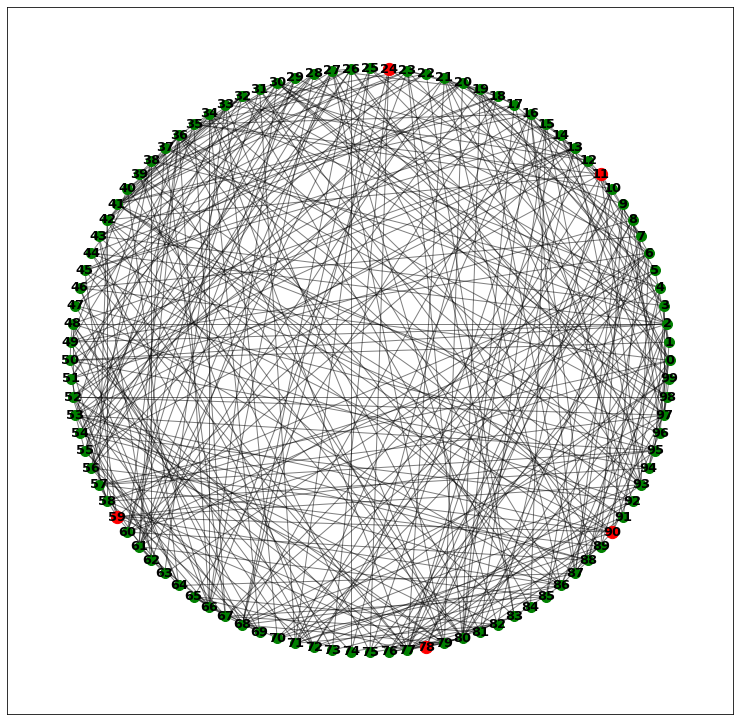

In [ ]:
pos = nx.circular_layout(G)
plt.figure(figsize=(13, 13))

nx.draw_networkx_nodes(G,
                       pos,
                       node_size=100,
                       nodelist=set(G.nodes) - set(green),
                       node_color="green")
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=green,
                       node_color="red")

nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G,
                        pos,
                        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
                        font_size=13,
                        font_weight='bold')
plt.show()

In [ ]:
#работаем с нейтральными вершинами
neutral = copy.deepcopy(left)
red = []
red1 = copy.deepcopy(red)
green1= copy.deepcopy(green)


In [ ]:
def change_neutral_color(node, G, left, green, red):
    to_nodes = set(list(zip(*list(G.edges(node))))[1])
    print(f'nodes {to_nodes}')
    red_nodes = to_nodes & set(red)
    green_nodes = to_nodes & set(green)

    if (len(red_nodes) + len(green_nodes) == 0):
        state = random.randint(1, 2)
        print('random:', state, '', node)
        return state

    if (len(red_nodes) > len(green_nodes)):
        print(node, ' ', 1)
        return 1

    if (len(red_nodes) <= len(green_nodes)):
        print(node, ' ', 2)
        return 2

In [ ]:
new_red =[]
new_green=[]
for i in range(len(neutral)):
    state = change_neutral_color(neutral[i], G, left, green, red)
    if state == 1:
        print(G.nodes[i]['color'])
        print('red')
        red1.append(neutral[i])
        new_red.append(neutral[i])
    if state == 2:
        print(G.nodes[i]['color'])
        print('green')
        green1.append(neutral[i])
        new_green.append(neutral[i])
# #         nx.set_node_attributes(G, {i:'green'}, 'color')

nodes {46, 14, 16, 80, 21, 86, 23, 57, 90, 60, 94}
0   2
white
green
nodes {8, 97, 50, 5}
random: 2  1
white
green
nodes {32, 96, 37, 44, 48, 49, 50, 80, 86, 89, 58, 30}
random: 2  2
white
green
nodes {97, 43, 75, 16, 19, 30, 95}
random: 2  3
white
green
nodes {34, 38, 76, 20, 88, 91, 60}
random: 1  4
white
red
nodes {1, 68, 71, 12, 25, 58}
random: 2  5
white
green
nodes {67, 70, 10, 80, 49, 29, 20, 93, 88, 61, 63}
random: 1  6
white
red
nodes {11, 46, 14, 81, 21, 85, 24, 90}
7   2
white
green
nodes {96, 1, 76, 77, 51, 87}
random: 1  8
white
red
nodes {97, 67, 78, 87, 89, 31}
9   2
white
green
nodes {35, 6, 72, 77, 78, 17, 85}
10   2
white
green
nodes {33, 5, 71, 11, 20, 53, 30}
12   2
red
green
nodes {77, 16, 49, 48, 51, 80, 21, 54, 60, 93}
random: 2  13
white
green
nodes {0, 97, 7, 45, 77, 15, 59}
14   2
white
green
nodes {75, 45, 14, 81, 84, 91}
random: 1  15
white
red
nodes {0, 35, 3, 68, 71, 41, 13, 80, 52, 87, 88}
random: 1  16
white
red
nodes {41, 10, 80, 18, 19, 50, 92}
random:

In [ ]:
G.nodes.data()

NodeDataView({0: {'color': 'white'}, 1: {'color': 'white'}, 2: {'color': 'white'}, 3: {'color': 'white'}, 4: {'color': 'white'}, 5: {'color': 'white'}, 6: {'color': 'white'}, 7: {'color': 'white'}, 8: {'color': 'white'}, 9: {'color': 'white'}, 10: {'color': 'white'}, 11: {'color': 'red'}, 12: {'color': 'white'}, 13: {'color': 'white'}, 14: {'color': 'white'}, 15: {'color': 'white'}, 16: {'color': 'white'}, 17: {'color': 'white'}, 18: {'color': 'white'}, 19: {'color': 'white'}, 20: {'color': 'white'}, 21: {'color': 'white'}, 22: {'color': 'white'}, 23: {'color': 'white'}, 24: {'color': 'red'}, 25: {'color': 'white'}, 26: {'color': 'white'}, 27: {'color': 'white'}, 28: {'color': 'white'}, 29: {'color': 'white'}, 30: {'color': 'white'}, 31: {'color': 'white'}, 32: {'color': 'white'}, 33: {'color': 'white'}, 34: {'color': 'white'}, 35: {'color': 'white'}, 36: {'color': 'white'}, 37: {'color': 'white'}, 38: {'color': 'white'}, 39: {'color': 'white'}, 40: {'color': 'white'}, 41: {'color': 'w

In [ ]:
len(new_red)

38

In [ ]:
len(new_green)

39

In [ ]:
new_red = dict(zip(new_red,["red"]*len(new_red)))
new_green = dict(zip(new_green,["green"]*len(new_green)))

In [ ]:
len(green1)

62

In [ ]:
len(red1)

38

In [ ]:
np.sort(np.array(red1))

array([ 4,  6,  8, 15, 16, 17, 21, 22, 29, 30, 32, 33, 34, 38, 39, 40, 44,
       46, 47, 49, 52, 54, 61, 62, 63, 65, 66, 69, 70, 76, 77, 81, 85, 88,
       89, 94, 97, 98])

In [ ]:
np.sort(np.array(green1))

array([ 0,  1,  2,  3,  5,  7,  9, 10, 11, 12, 13, 14, 18, 19, 20, 23, 24,
       25, 26, 27, 28, 31, 35, 36, 37, 41, 42, 43, 45, 48, 50, 51, 53, 55,
       56, 57, 58, 59, 60, 64, 67, 68, 71, 72, 73, 74, 75, 78, 79, 80, 82,
       83, 84, 86, 87, 90, 91, 92, 93, 95, 96, 99])

In [ ]:
set(neutral)-set(red1)-set(green1)

set()

In [ ]:
np.array(red)

array([42, 96, 33, 94, 26, 83,  1, 28, 11, 13, 78, 23, 59, 79, 18, 45, 81,
       37,  8, 93])

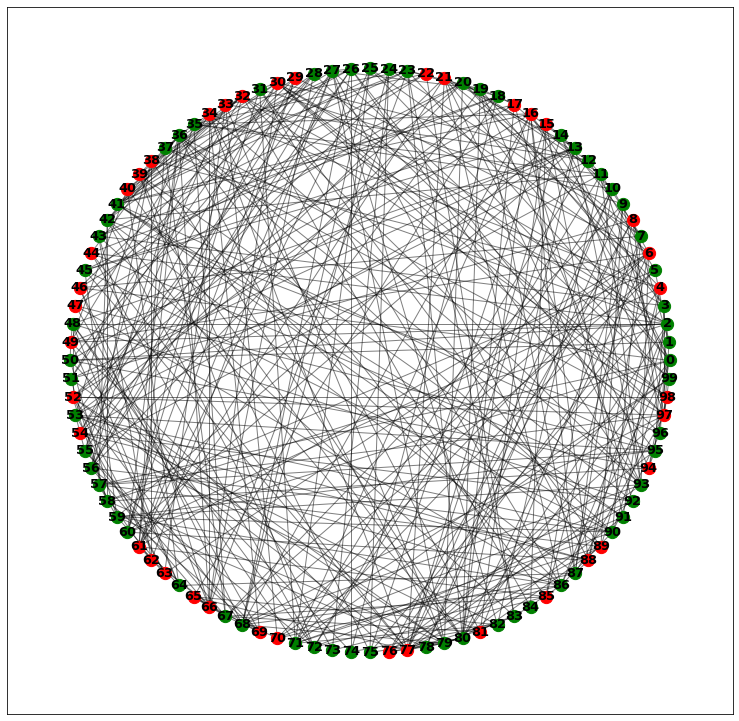

In [ ]:
red_amount=[len(red),40,34,len(red1)]
green_amount=[len(green),24,45,len(green1)]
x = [0,1,2,3]

pos = nx.circular_layout(G)
plt.figure(figsize=(13, 13))


nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=red1,
                       node_color="red")
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=green1,
                       node_color="green")

nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G,
                        pos,
                        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
                        font_size=13,
                        font_weight='bold')
plt.show()